***1.Data Preprocessing***

***Check for missing values, outliers, and noise in the data and perform data cleaning if necessary***

In [112]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
print(Energy_usage_values.head())
print("Information of the Data set:")
Energy_usage_values.info()
print("%%%%%%%%%%")
print("checking null value count from the dataset:")
Energy_usage_values.isnull().sum()
# From above, we have checked for NUll Values and missing Numbers
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
print("Below are the columns that need to be encoded:")
print("\n")
print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)
print("After Encoding the Energy_usage_values_to_encode values:")
print('\n')
print(Energy_usage_values_to_encode)
# Now that, we have encoded, we will be updating these values in original dataset.
Energy_usage_values.update(Energy_usage_values_to_encode)
print("After updating the original dataset:")
print('\n')
print(Energy_usage_values.head()) # displays the updated data, thus the enire cleaning process is completed.
# Now we need to check for timestamp as well.
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])

# Display the extracted features
print(Energy_usage_values.head())


             Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732  
Information of

***Visualizing the Trends of Data using boxplots and through sorting Data Methods.***

After sorting the values:


     Temperature   Humidity  SquareFootage  Occupancy HVACUsage LightingUsage  \
0      20.007565  30.015975    1000.512661          0         0             0   
1      20.036287  30.032665    1003.941513          0         0             0   
2      20.044357  30.135706    1004.110672          0         0             0   
3      20.058738  30.153231    1004.406550          0         0             0   
4      20.067499  30.161940    1004.454695          0         0             0   
..           ...        ...            ...        ...       ...           ...   
995    29.986663  59.937571    1995.022126          9         1             1   
996    29.988046  59.938708    1998.439525          9         1             1   
997    29.989584  59.950060    1999.204208          9         1             1   
998    29.992580  59.954514    1999.750981          9         1             1   
999    29.998671  59.969085    1999.982252          9         1             1   


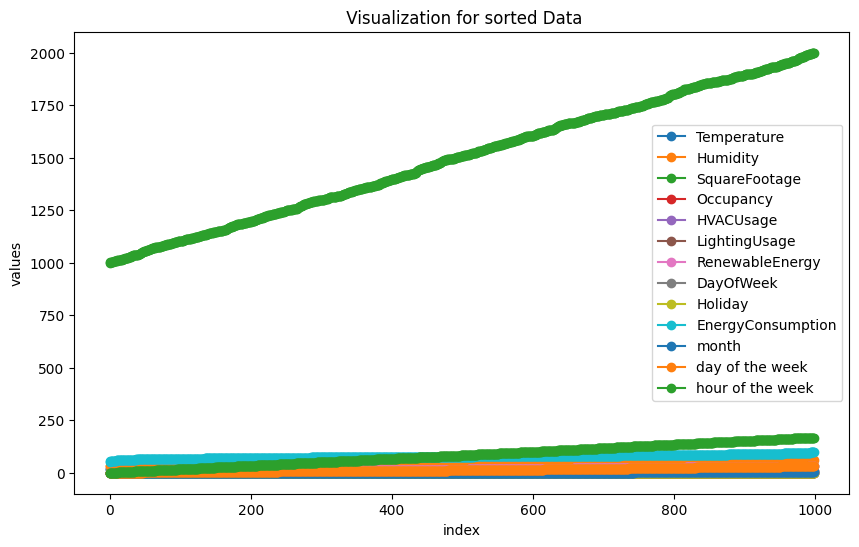

Finding the type of Distributions and outliers from the dataset using Boxplots:




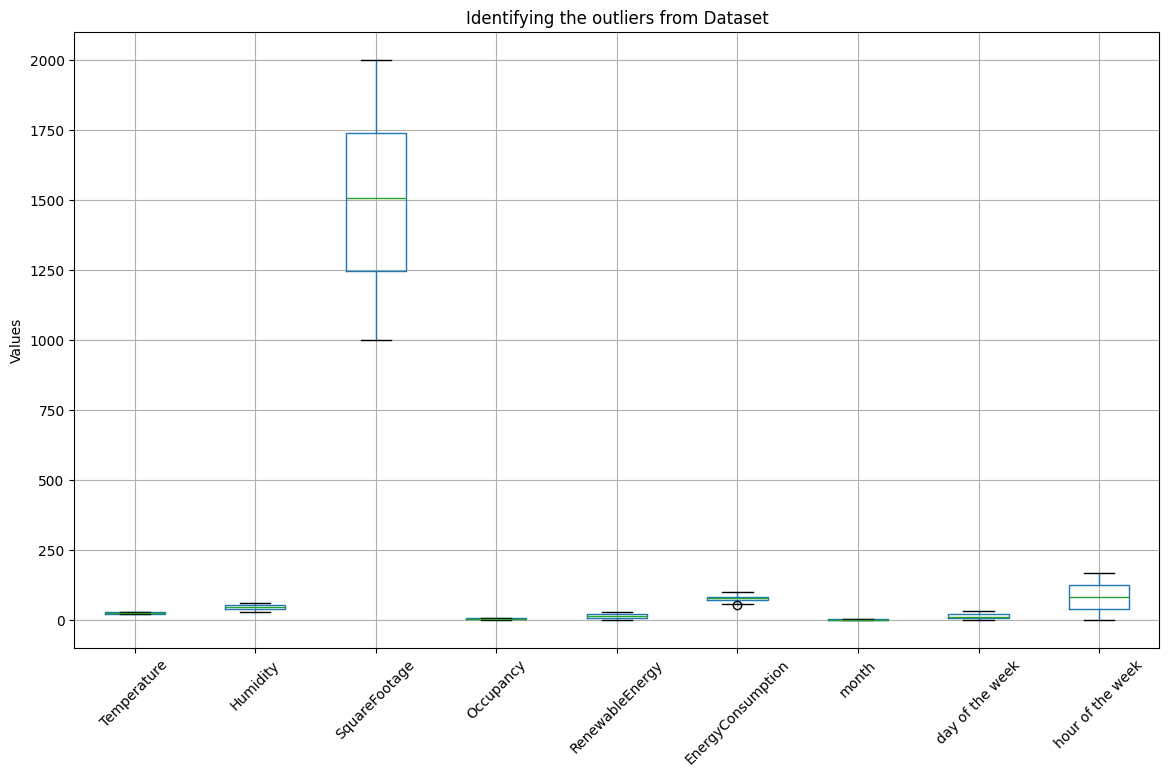

In [52]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# From above, we have checked for NUll Values and missing Numbers
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)
#print("After Encoding the Energy_usage_values_to_encode values:")
#print('\n')
#print(Energy_usage_values_to_encode)
# Now that, we have encoded, we will be updating these values in original dataset.
Energy_usage_values.update(Energy_usage_values_to_encode)
#print("After updating the original dataset:")
#print('\n')
#print(Energy_usage_values) # displays the updated data, thus the enire cleaning process is completed.
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# now, that we have all the respective data in numerical columns, we will be visualizing the data after performing the sorting methods.
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})
print("After sorting the values:")
print('\n')
print(sorted_Energy_usage_values)
# Now, we are gonna use these sorted values for visualization, which is one approach of finding the distributions.
print("finding the outliers using the visualization concept on sorted Data set:")
sorted_Energy_usage_values.plot(kind = "line", marker = 'o', figsize = (10,6))
plt.title(" Visualization for sorted Data")
plt.xlabel("index")
plt.ylabel("values")
plt.show()
# Above is one approach, but cannot be accurately perfect to identify the distributions and outliers, we we will be choosing Boxplots Visualization.
#Below code reprents use of boxplots for data to find the outliers from dataset.
print("Finding the type of Distributions and outliers from the dataset using Boxplots:")
print("\n")
plt.figure(figsize = (14,8))
Energy_usage_values.boxplot()
plt.title("Identifying the outliers from Dataset")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()




***Standardize or normalize the values to ensure consistency if necessary***

***Splitting the Data into Train and Test, to Avoid Data Leakage, and finding the distribution according to the BoxPlots, before Normalizing or Scaling***

     Temperature   Humidity  SquareFootage  Occupancy HVACUsage LightingUsage  \
0      20.007565  30.015975    1000.512661          0         0             0   
1      20.036287  30.032665    1003.941513          0         0             0   
2      20.044357  30.135706    1004.110672          0         0             0   
3      20.058738  30.153231    1004.406550          0         0             0   
4      20.067499  30.161940    1004.454695          0         0             0   
..           ...        ...            ...        ...       ...           ...   
995    29.986663  59.937571    1995.022126          9         1             1   
996    29.988046  59.938708    1998.439525          9         1             1   
997    29.989584  59.950060    1999.204208          9         1             1   
998    29.992580  59.954514    1999.750981          9         1             1   
999    29.998671  59.969085    1999.982252          9         1             1   

     RenewableEnergy DayOfW

<function matplotlib.pyplot.show(close=None, block=None)>

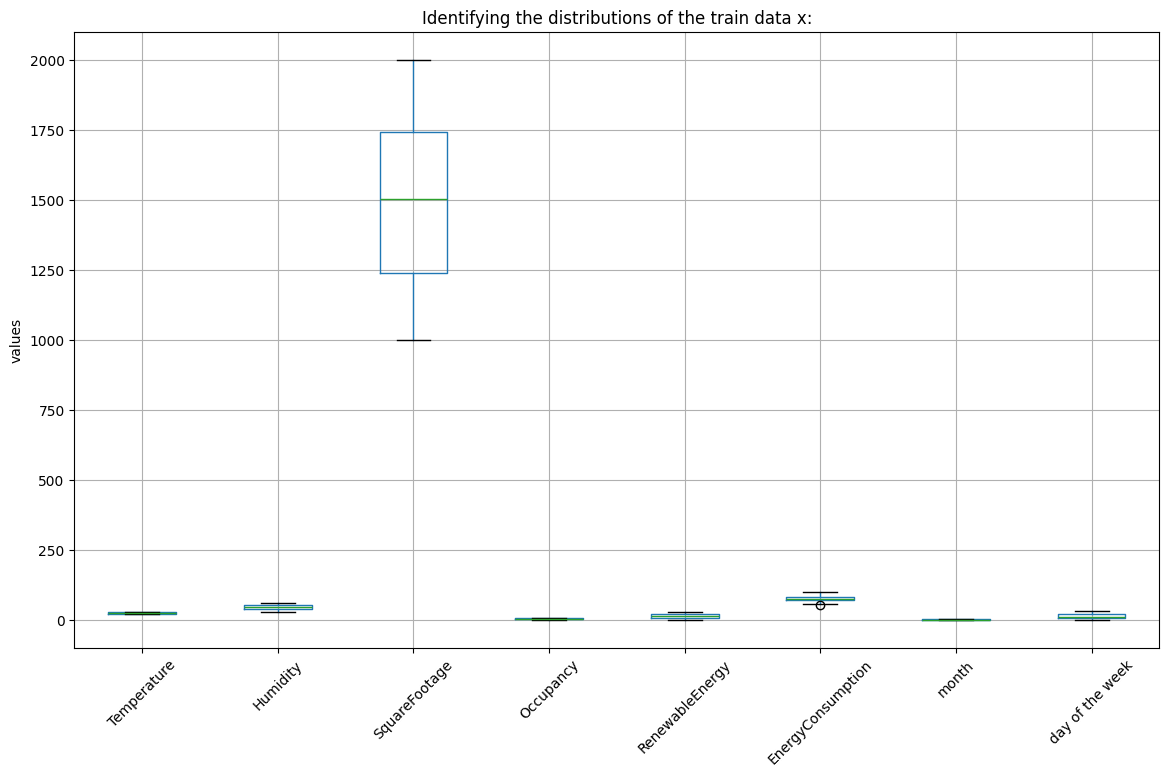

In [46]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.iloc[:,:-1]
y_sorted_Energy_usage_values = sorted_Energy_usage_values.iloc[:,-1]

print(x_sorted_Energy_usage_values)
print("$$$$$$$$$$$$$$")
print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

print("The training and testing dataset of x_sorted_Energy_usage_values is:")
print(x_sorted_Energy_usage_values_train)
print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
print(x_sorted_Energy_usage_values_test)

print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print("The training and testing dataset of y_sorted_Energy_usage_values is:")
print(y_sorted_Energy_usage_values_train)
print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

plt.figure(figsize=(14,8))
x_sorted_Energy_usage_values_train.boxplot()
plt.title("Identifying the distributions of the train data x:")
plt.ylabel("values")
plt.xticks(rotation=45)
plt.show



***Normalizing Or Scaling the Data According to its Distributions.***

 The Data after usage of scaling methods are:

x_sorted_Energy_usage_values_train:

     Temperature  Humidity  SquareFootage  Occupancy HVACUsage LightingUsage  \
29      0.036572  0.029026      -1.634085  -1.721743         0             0   
535     0.504576  0.560269       0.152004   0.217414         1             1   
695     0.671684  0.696405       0.704153   0.852310         1             1   
557     0.528993  0.577379       0.234438   0.217414         1             1   
836     0.833593  0.842872       1.200965   1.154799         1             1   
..           ...       ...            ...        ...       ...           ...   
106     0.120170  0.122435      -1.350232  -1.257117         0             0   
270     0.277454  0.299958      -0.790226  -0.848526         0             0   
860     0.862026  0.870801       1.259220   1.154799         1             1   
435     0.428697  0.464068      -0.228068  -0.119078         0             0   
102     0.114286  0.119972      -1.3

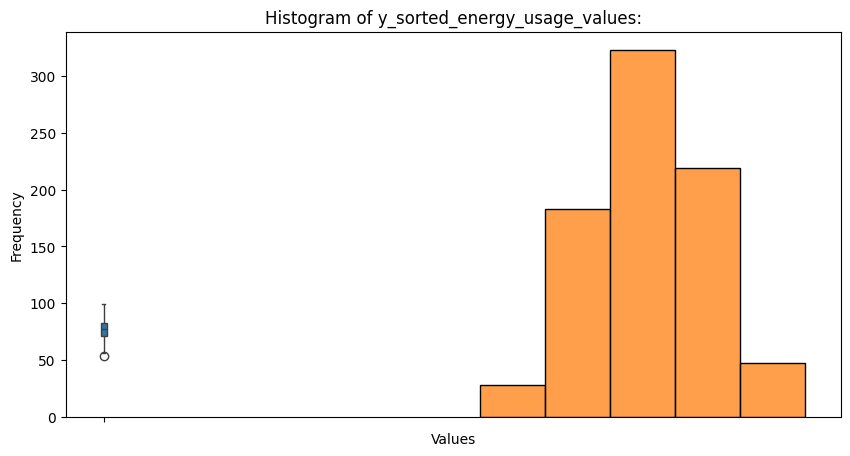

 y_train Data after scaling methods usage:
     EnergyConsumption
29           -1.833388
535           0.072521
695           0.541271
557           0.126157
836           1.017757
..                 ...
106          -1.240715
270          -0.614923
860           1.132874
435          -0.161431
102          -1.273932

[800 rows x 1 columns]
After Transforming the test data:
Transformed x_test_data:
     Temperature  Humidity  SquareFootage  Occupancy HVACUsage LightingUsage  \
521     0.496323  0.542121       0.096163   0.217414         1             1   
737     0.730373  0.740297       0.805493   0.852310         1             1   
740     0.731890  0.742793       0.821241   0.852310         1             1   
660     0.641421  0.666037       0.585365   0.540419         1             1   
411     0.411809  0.442009      -0.312028  -0.119078         0             0   
..           ...       ...            ...        ...       ...           ...   
408     0.409943  0.439904      -0.326

In [109]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.drop(columns=['EnergyConsumption'])
y_sorted_Energy_usage_values = sorted_Energy_usage_values['EnergyConsumption']

#print(x_sorted_Energy_usage_values)
#print("$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

#print("The training and testing dataset of x_sorted_Energy_usage_values is:")
#print(x_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(x_sorted_Energy_usage_values_test)

#print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
#print("The training and testing dataset of y_sorted_Energy_usage_values is:")
#print(y_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

# understanding the each of the training data distribution for x and y once again by using box-plots

#plt.figure(figsize=(14,8))
#x_sorted_Energy_usage_values_train.boxplot()
#plt.title("Identifying the distributions of the train data x:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

# applying respective scaling on the features of Energy usage values
# applying minmax scaler to "Temperature" and "Humidity" feratures of Energy Usage Values, as they follow "Uniform_Distribution".
scaler_minmax = MinMaxScaler()
x_sorted_Energy_usage_values_train[["Temperature","Humidity"]] = scaler_minmax.fit_transform(x_sorted_Energy_usage_values_train[["Temperature","Humidity"]])

# applying standard scalar for "Square_Footage" feature of Energy_Usage_Vlaues Dataset, as this feature follow "Normal_Distribution"
scaler_standard = StandardScaler()
x_sorted_Energy_usage_values_train[["SquareFootage"]] = scaler_standard.fit_transform(x_sorted_Energy_usage_values_train[["SquareFootage"]])

#applying power transformer on "Occupancy" and "Renewable Energy Resource" features of Energy_usage_values dataset, as they follow "Right_Skewed_Distribution".
scaler_power_OR = PowerTransformer(method = "yeo-johnson")
x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy "]] = scaler_power_OR.fit_transform(x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy"]])

print(" The Data after usage of scaling methods are:\n")
print("x_sorted_Energy_usage_values_train:\n")
print(x_sorted_Energy_usage_values_train)

plt.figure(figsize=(10,5))
sns.boxplot(data = y_sorted_Energy_usage_values_train)
plt.title("Identifying the distributions of the train data y:")
plt.ylabel("values")
plt.xticks(rotation=45)
plt.show
print("Histogram Plot")
print("\n")
sns.histplot(data =y_sorted_Energy_usage_values_train , bins=5, kde=False)
plt.title('Histogram of y_sorted_energy_usage_values:')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

#applying Power Transformer to "Energy_consumption" feature of Energy_usage_values dataset,as this follows "Right_skewed_distribution".
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
#print(y_sorted_Energy_usage_values_train)
scaler_power = PowerTransformer(method = "yeo-johnson")
y_sorted_Energy_usage_values_train['EnergyConsumption'] = scaler_power.fit_transform(y_sorted_Energy_usage_values_train[['EnergyConsumption']])

print(" y_train Data after scaling methods usage:")
print(y_sorted_Energy_usage_values_train)

#Now transforming the test data as well according to training Data

x_sorted_Energy_usage_values_test[["Temperature","Humidity"]] = scaler_minmax.transform(x_sorted_Energy_usage_values_test[["Temperature","Humidity"]])
x_sorted_Energy_usage_values_test[["SquareFootage"]] = scaler_standard.transform(x_sorted_Energy_usage_values_test[["SquareFootage"]])
x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy "]] = scaler_power_OR.transform(x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy"]])

print("After Transforming the test data:")
print("Transformed x_test_data:")
print(x_sorted_Energy_usage_values_test)
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
print("Transformed y_test_data:")
print(y_sorted_Energy_usage_values_test)


***Conduct exploratory data analysis to visualize the data trends and patterns.***

***Visualization Of Data after performing scaling Methods***

 The Data after usage of scaling methods are:

x_sorted_Energy_usage_values_train:

     Temperature  Humidity  SquareFootage  Occupancy  HVACUsage  \
29      0.036572  0.029026      -1.634085  -1.721743  -0.970437   
535     0.504576  0.560269       0.152004   0.217414   1.030464   
695     0.671684  0.696405       0.704153   0.852310   1.030464   
557     0.528993  0.577379       0.234438   0.217414   1.030464   
836     0.833593  0.842872       1.200965   1.154799   1.030464   
..           ...       ...            ...        ...        ...   
106     0.120170  0.122435      -1.350232  -1.257117  -0.970437   
270     0.277454  0.299958      -0.790226  -0.848526  -0.970437   
860     0.862026  0.870801       1.259220   1.154799   1.030464   
435     0.428697  0.464068      -0.228068  -0.119078  -0.970437   
102     0.114286  0.119972      -1.364152  -1.257117  -0.970437   

     LightingUsage  RenewableEnergy DayOfWeek Holiday  month  day of the week  \
29       -0.968011         0.5

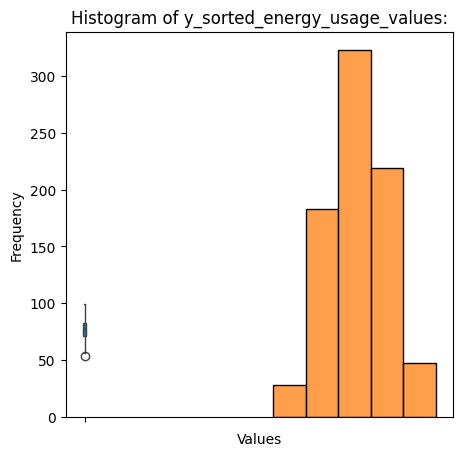

 y_train Data after scaling methods usage:
     EnergyConsumption
29           -1.833388
535           0.072521
695           0.541271
557           0.126157
836           1.017757
..                 ...
106          -1.240715
270          -0.614923
860           1.132874
435          -0.161431
102          -1.273932

[800 rows x 1 columns]
Below Graphs depict the Visual representation of all the features:


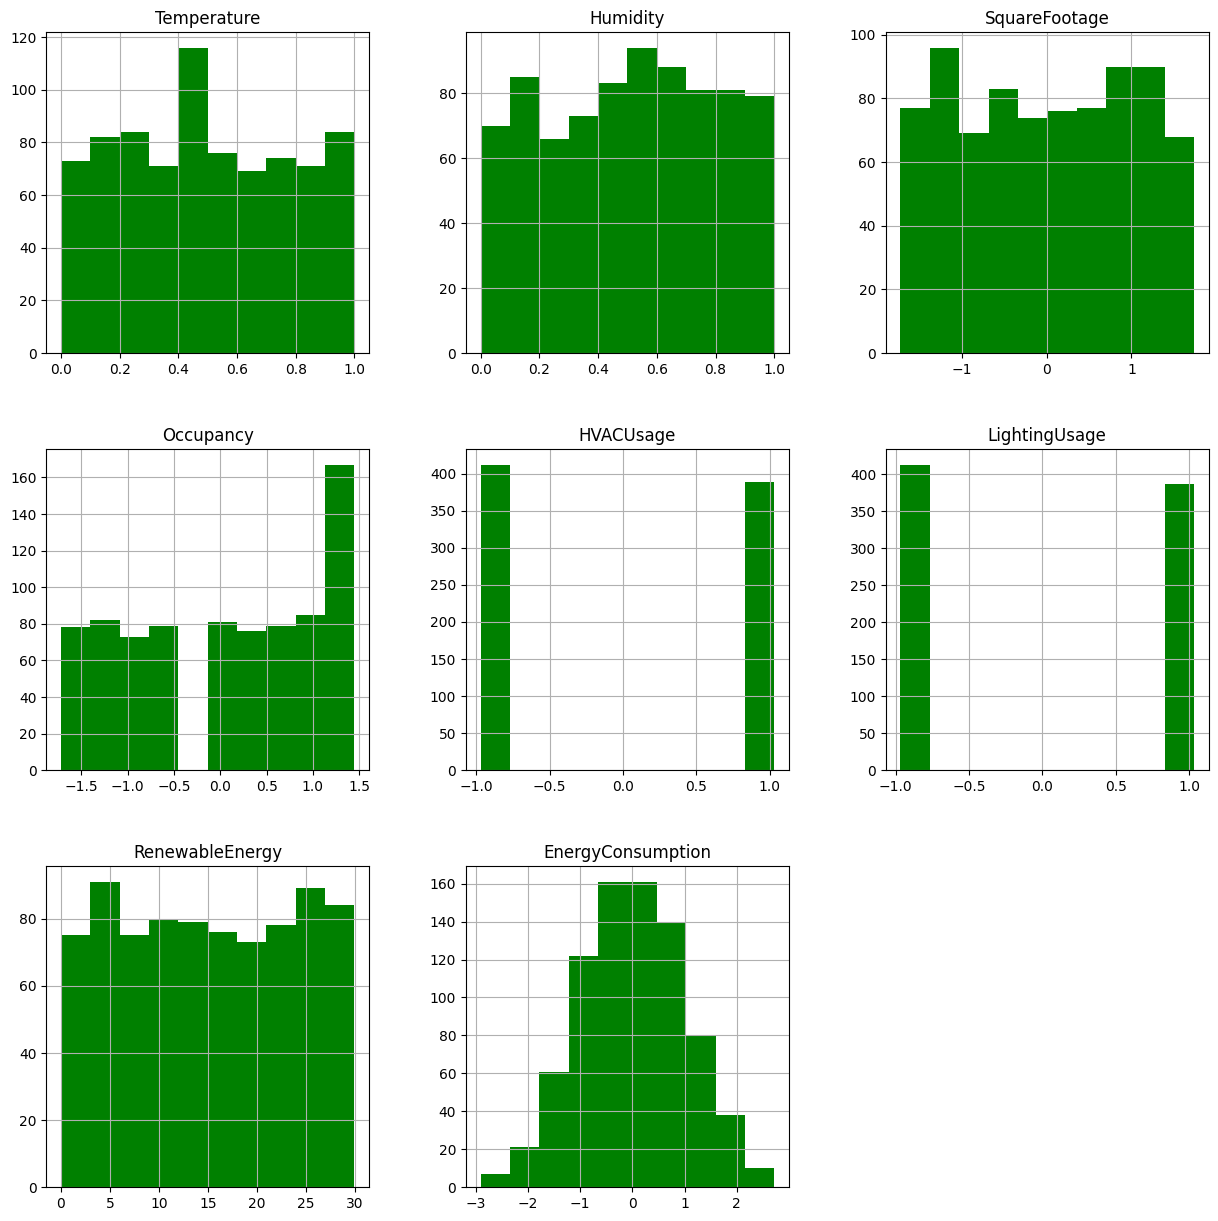

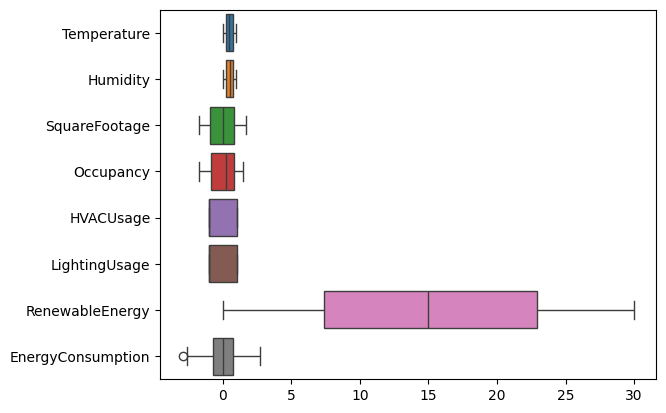

Below graph depicts the trends of features:


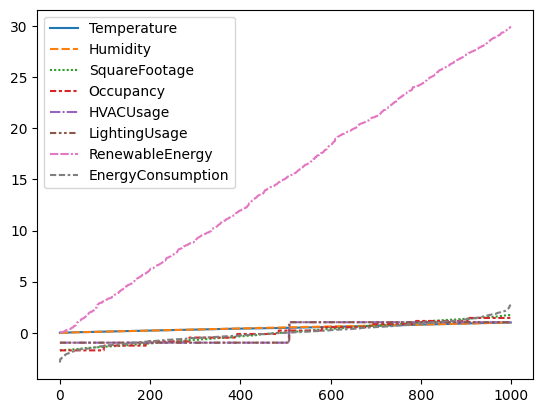

In [48]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.drop(columns=['EnergyConsumption'])
y_sorted_Energy_usage_values = sorted_Energy_usage_values['EnergyConsumption']

#print(x_sorted_Energy_usage_values)
#print("$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

#print("The training and testing dataset of x_sorted_Energy_usage_values is:")
#print(x_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(x_sorted_Energy_usage_values_test)

#print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
#print("The training and testing dataset of y_sorted_Energy_usage_values is:")
#print(y_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

# understanding the each of the training data distribution for x and y once again by using box-plots

#plt.figure(figsize=(14,8))
#x_sorted_Energy_usage_values_train.boxplot()
#plt.title("Identifying the distributions of the train data x:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

# applying respective scaling on the features of Energy usage values
# applying minmax scaler to "Temperature" and "Humidity" feratures of Energy Usage Values, as they follow "Uniform_Distribution".
scaler_minmax = MinMaxScaler()
x_sorted_Energy_usage_values_train[["Temperature","Humidity"]] = scaler_minmax.fit_transform(x_sorted_Energy_usage_values_train[["Temperature","Humidity"]])

# applying standard scalar for "Square_Footage" feature of Energy_Usage_Vlaues Dataset, as this feature follow "Normal_Distribution"
scaler_standard = StandardScaler()
x_sorted_Energy_usage_values_train[["SquareFootage"]] = scaler_standard.fit_transform(x_sorted_Energy_usage_values_train[["SquareFootage"]])
scalar_standard_HVAC = StandardScaler()
x_sorted_Energy_usage_values_train[["HVACUsage"]] = scalar_standard_HVAC.fit_transform(x_sorted_Energy_usage_values_train[["HVACUsage"]])
scalar_standard_Lighting = StandardScaler()
x_sorted_Energy_usage_values_train[["LightingUsage"]] = scalar_standard_Lighting.fit_transform(x_sorted_Energy_usage_values_train[["LightingUsage"]])

#applying power transformer on "Occupancy" and "Renewable Energy Resource" features of Energy_usage_values dataset, as they follow "Right_Skewed_Distribution".
scaler_power_OR = PowerTransformer(method = "yeo-johnson")
x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy "]] = scaler_power_OR.fit_transform(x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy"]])

print(" The Data after usage of scaling methods are:\n")
print("x_sorted_Energy_usage_values_train:\n")
print(x_sorted_Energy_usage_values_train)

plt.figure(figsize=(5,5))
sns.boxplot(data = y_sorted_Energy_usage_values_train)
plt.title("Identifying the distributions of the train data y:")
plt.ylabel("values")
plt.xticks(rotation=45)
plt.show

sns.histplot(data =y_sorted_Energy_usage_values_train , bins=5, kde=False)
plt.title('Histogram of y_sorted_energy_usage_values:')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

#applying Power Transformer to "Energy_consumption" feature of Energy_usage_values dataset,as this follows "Right_skewed_distribution".
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
#print(y_sorted_Energy_usage_values_train)
scaler_power = PowerTransformer(method = "yeo-johnson")
y_sorted_Energy_usage_values_train['EnergyConsumption'] = scaler_power.fit_transform(y_sorted_Energy_usage_values_train[['EnergyConsumption']])

print(" y_train Data after scaling methods usage:")
print(y_sorted_Energy_usage_values_train)

#Now transforming the test data as well according to training Data

x_sorted_Energy_usage_values_test[["Temperature","Humidity"]] = scaler_minmax.transform(x_sorted_Energy_usage_values_test[["Temperature","Humidity"]])
x_sorted_Energy_usage_values_test[["SquareFootage"]] = scaler_standard.transform(x_sorted_Energy_usage_values_test[["SquareFootage"]])
x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy "]] = scaler_power_OR.transform(x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy"]])
x_sorted_Energy_usage_values_test[["HVACUsage"]] = scalar_standard_HVAC.transform(x_sorted_Energy_usage_values_test[["HVACUsage"]])
x_sorted_Energy_usage_values_test[["LightingUsage"]] = scalar_standard_Lighting.transform(x_sorted_Energy_usage_values_test[["LightingUsage"]])
# Now we will be conducting the Exploratory Data Analysis for the features and identify the trends of the data pattern.
features = x_sorted_Energy_usage_values_train[['Temperature','Humidity','SquareFootage','Occupancy','HVACUsage','LightingUsage' ,'RenewableEnergy']]
features_all = features.copy()
features_all['EnergyConsumption'] = y_sorted_Energy_usage_values_train['EnergyConsumption']
#Now we will find the EDA
# Designing the Histogram for distribution.
print('Below Graphs depict the Visual representation of all the features:')
features_all.hist(figsize=(15,15),color ='green')
plt.show()
#Boxplot to see the outliers and datapoints spread
sns.boxplot(data = features_all, orient ='h')
plt.show()

#Now we will be checking the Trend Analysis for the features.
print("Below graph depicts the trends of features:")
sns.lineplot(data = features_all)
plt.show()


***Identifying Correlation Between Features***

Below graph depicts the corelation between the features:


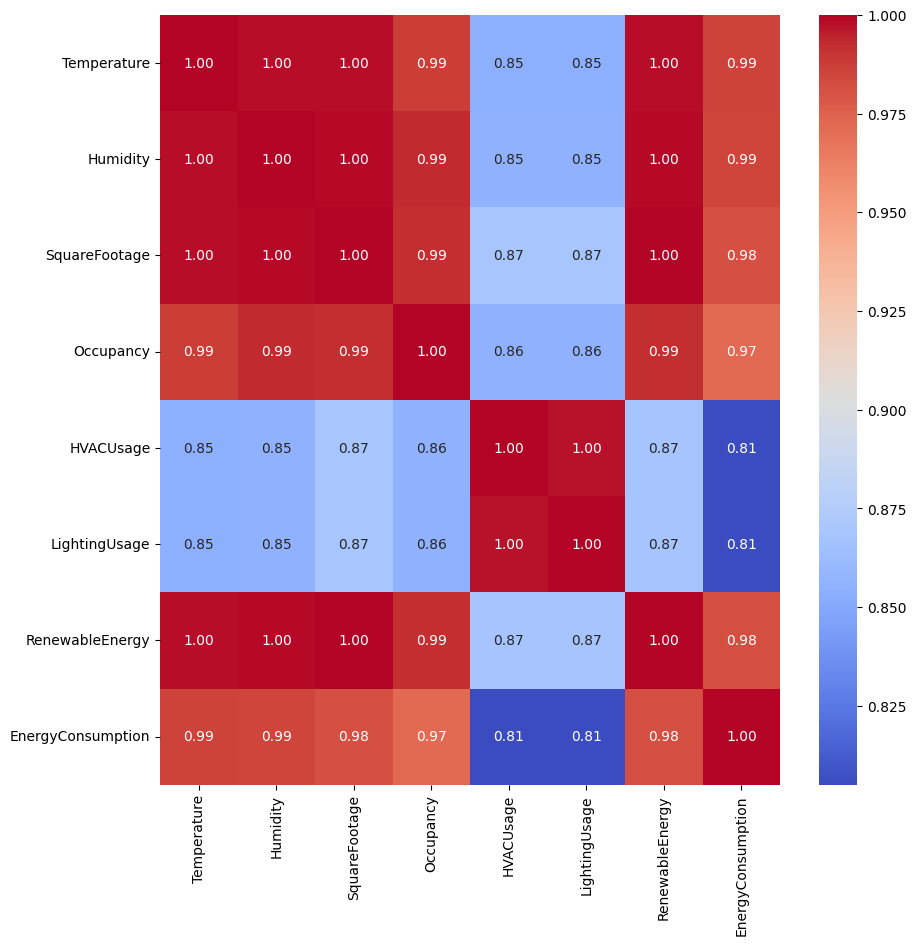

In [107]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.drop(columns=['EnergyConsumption'])
y_sorted_Energy_usage_values = sorted_Energy_usage_values['EnergyConsumption']

#print(x_sorted_Energy_usage_values)
#print("$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

#print("The training and testing dataset of x_sorted_Energy_usage_values is:")
#print(x_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(x_sorted_Energy_usage_values_test)

#print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
#print("The training and testing dataset of y_sorted_Energy_usage_values is:")
#print(y_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

# understanding the each of the training data distribution for x and y once again by using box-plots

#plt.figure(figsize=(14,8))
#x_sorted_Energy_usage_values_train.boxplot()
#plt.title("Identifying the distributions of the train data x:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

# applying respective scaling on the features of Energy usage values
# applying minmax scaler to "Temperature" and "Humidity" feratures of Energy Usage Values, as they follow "Uniform_Distribution".
scaler_minmax = MinMaxScaler()
x_sorted_Energy_usage_values_train[["Temperature","Humidity"]] = scaler_minmax.fit_transform(x_sorted_Energy_usage_values_train[["Temperature","Humidity"]])

# applying standard scalar for "Square_Footage" feature of Energy_Usage_Vlaues Dataset, as this feature follow "Normal_Distribution"
scaler_standard = StandardScaler()
x_sorted_Energy_usage_values_train[["SquareFootage"]] = scaler_standard.fit_transform(x_sorted_Energy_usage_values_train[["SquareFootage"]])
scalar_standard_HVAC = StandardScaler()
x_sorted_Energy_usage_values_train[["HVACUsage"]] = scalar_standard_HVAC.fit_transform(x_sorted_Energy_usage_values_train[["HVACUsage"]])
scalar_standard_Lighting = StandardScaler()
x_sorted_Energy_usage_values_train[["LightingUsage"]] = scalar_standard_Lighting.fit_transform(x_sorted_Energy_usage_values_train[["LightingUsage"]])

#applying power transformer on "Occupancy" and "Renewable Energy Resource" features of Energy_usage_values dataset, as they follow "Right_Skewed_Distribution".
scaler_power_OR = PowerTransformer(method = "yeo-johnson")
x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy "]] = scaler_power_OR.fit_transform(x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy"]])

#print(" The Data after usage of scaling methods are:\n")
#print("x_sorted_Energy_usage_values_train:\n")
#print(x_sorted_Energy_usage_values_train)

#plt.figure(figsize=(5,5))
#sns.boxplot(data = y_sorted_Energy_usage_values_train)
#plt.title("Identifying the distributions of the train data y:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

#sns.histplot(data =y_sorted_Energy_usage_values_train , bins=5, kde=False)
#plt.title('Histogram of y_sorted_energy_usage_values:')
#plt.xlabel('Values')
#plt.ylabel('Frequency')
#plt.show()

#applying Power Transformer to "Energy_consumption" feature of Energy_usage_values dataset,as this follows "Right_skewed_distribution".
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
#print(y_sorted_Energy_usage_values_train)
scaler_power = PowerTransformer(method = "yeo-johnson")
y_sorted_Energy_usage_values_train['EnergyConsumption'] = scaler_power.fit_transform(y_sorted_Energy_usage_values_train[['EnergyConsumption']])

#print(" y_train Data after scaling methods usage:")
#print(y_sorted_Energy_usage_values_train)

#Now transforming the test data as well according to training Data

x_sorted_Energy_usage_values_test[["Temperature","Humidity"]] = scaler_minmax.transform(x_sorted_Energy_usage_values_test[["Temperature","Humidity"]])
x_sorted_Energy_usage_values_test[["SquareFootage"]] = scaler_standard.transform(x_sorted_Energy_usage_values_test[["SquareFootage"]])
x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy "]] = scaler_power_OR.transform(x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy"]])
x_sorted_Energy_usage_values_test[["HVACUsage"]] = scalar_standard_HVAC.transform(x_sorted_Energy_usage_values_test[["HVACUsage"]])
x_sorted_Energy_usage_values_test[["LightingUsage"]] = scalar_standard_Lighting.transform(x_sorted_Energy_usage_values_test[["LightingUsage"]])

x_sorted_Energy_usage_values_train = pand.DataFrame(x_sorted_Energy_usage_values_train)
features = x_sorted_Energy_usage_values_train[['Temperature','Humidity','SquareFootage','Occupancy','HVACUsage','LightingUsage','RenewableEnergy']]
# as we need to find correlation between features, we are temperorily concatanating all the features with 'EnergyConsumption'.
features_all = features.copy()
features_all['EnergyConsumption'] = y_sorted_Energy_usage_values_train['EnergyConsumption']
features_all_correlation = features_all.corr()

# Now creating the graph based on the correlation
print("Below graph depicts the corelation between the features:")
plt.figure(figsize = (10,10))
sns.heatmap(features_all_correlation, annot = True, cmap = 'coolwarm', fmt='.2f')
plt.show()

***2.Build three different models to forecast energy consumption.***

***Compare the performance of different algorithms using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score***

***Linear Regressor Model, with Evaluation Metrics such as Accuracy, Precision, Recall, F1 Score***

Linear Regression Evaluation Metrics:
MAE: 77.36122249179849, MSE: 6034.395124388868, R² Score: -93.0196404373048


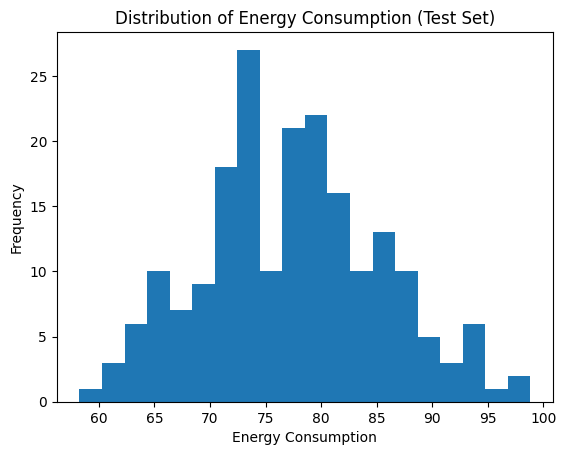

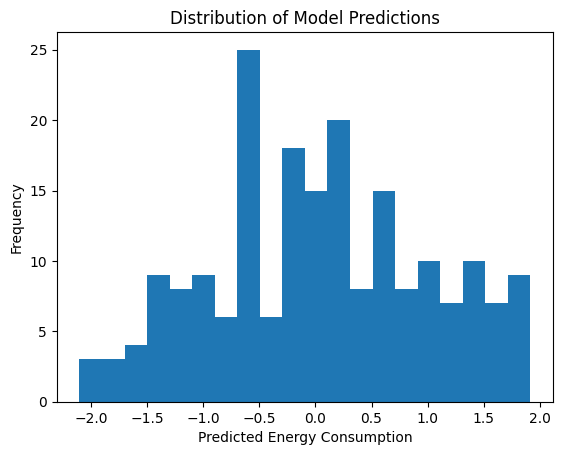


Classification Metrics:
Accuracy: 0.6000
Precision: 0.3600
Recall: 0.6000
F1 Score: 0.4500


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.drop(columns=['EnergyConsumption'])
y_sorted_Energy_usage_values = sorted_Energy_usage_values['EnergyConsumption']

#print(x_sorted_Energy_usage_values)
#print("$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

#print("The training and testing dataset of x_sorted_Energy_usage_values is:")
#print(x_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(x_sorted_Energy_usage_values_test)

#print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
#print("The training and testing dataset of y_sorted_Energy_usage_values is:")
#print(y_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

# understanding the each of the training data distribution for x and y once again by using box-plots

#plt.figure(figsize=(14,8))
#x_sorted_Energy_usage_values_train.boxplot()
#plt.title("Identifying the distributions of the train data x:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

# applying respective scaling on the features of Energy usage values
# applying minmax scaler to "Temperature" and "Humidity" feratures of Energy Usage Values, as they follow "Uniform_Distribution".
scaler_minmax = MinMaxScaler()
x_sorted_Energy_usage_values_train[["Temperature","Humidity"]] = scaler_minmax.fit_transform(x_sorted_Energy_usage_values_train[["Temperature","Humidity"]])

# applying standard scalar for "Square_Footage" feature of Energy_Usage_Vlaues Dataset, as this feature follow "Normal_Distribution"
scaler_standard = StandardScaler()
x_sorted_Energy_usage_values_train[["SquareFootage"]] = scaler_standard.fit_transform(x_sorted_Energy_usage_values_train[["SquareFootage"]])
scalar_standard_HVAC = StandardScaler()
x_sorted_Energy_usage_values_train[["HVACUsage"]] = scalar_standard_HVAC.fit_transform(x_sorted_Energy_usage_values_train[["HVACUsage"]])
scalar_standard_Lighting = StandardScaler()
x_sorted_Energy_usage_values_train[["LightingUsage"]] = scalar_standard_Lighting.fit_transform(x_sorted_Energy_usage_values_train[["LightingUsage"]])

#applying power transformer on "Occupancy" and "Renewable Energy Resource" features of Energy_usage_values dataset, as they follow "Right_Skewed_Distribution".
scaler_power_OR = PowerTransformer(method = "yeo-johnson")
x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy "]] = scaler_power_OR.fit_transform(x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy"]])

#print(" The Data after usage of scaling methods are:\n")
#print("x_sorted_Energy_usage_values_train:\n")
#print(x_sorted_Energy_usage_values_train)

#plt.figure(figsize=(5,5))
#sns.boxplot(data = y_sorted_Energy_usage_values_train)
#plt.title("Identifying the distributions of the train data y:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

#sns.histplot(data =y_sorted_Energy_usage_values_train , bins=5, kde=False)
#plt.title('Histogram of y_sorted_energy_usage_values:')
#plt.xlabel('Values')
#plt.ylabel('Frequency')
#plt.show()

#applying Power Transformer to "Energy_consumption" feature of Energy_usage_values dataset,as this follows "Right_skewed_distribution".
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
#print(y_sorted_Energy_usage_values_train)
scaler_power = PowerTransformer(method = "yeo-johnson")
y_sorted_Energy_usage_values_train['EnergyConsumption'] = scaler_power.fit_transform(y_sorted_Energy_usage_values_train[['EnergyConsumption']])

#print(" y_train Data after scaling methods usage:")
#print(y_sorted_Energy_usage_values_train)

#Now transforming the test data as well according to training Data

x_sorted_Energy_usage_values_test[["Temperature","Humidity"]] = scaler_minmax.transform(x_sorted_Energy_usage_values_test[["Temperature","Humidity"]])
x_sorted_Energy_usage_values_test[["SquareFootage"]] = scaler_standard.transform(x_sorted_Energy_usage_values_test[["SquareFootage"]])
x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy "]] = scaler_power_OR.transform(x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy"]])
x_sorted_Energy_usage_values_test[["HVACUsage"]] = scalar_standard_HVAC.transform(x_sorted_Energy_usage_values_test[["HVACUsage"]])
x_sorted_Energy_usage_values_test[["LightingUsage"]] = scalar_standard_Lighting.transform(x_sorted_Energy_usage_values_test[["LightingUsage"]])

x_sorted_Energy_usage_values_train = pand.DataFrame(x_sorted_Energy_usage_values_train)
x_sorted_Energy_usage_values_test = pand.DataFrame(x_sorted_Energy_usage_values_test)
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
y_sorted_Energy_usage_values_test = pand.DataFrame(y_sorted_Energy_usage_values_test)
#But, before that, we need to do something about the timestamp column from the dataset.


# Assigning the Regression model to a variable
Linear_Model = LinearRegression()
# Training the respective datasets with Linear_Models
Linear_Model.fit(x_sorted_Energy_usage_values_train,y_sorted_Energy_usage_values_train)
# As we completed our training with above training dataset, let's predict the testing Dataset
Energy_usage_values_test_predictions_linear = Linear_Model.predict(x_sorted_Energy_usage_values_test)
MAE_linear_model = mean_absolute_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_linear)
MSE_linear_model = mean_squared_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_linear)
R2_linear_model = r2_score(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_linear)
# Display results
print("Linear Regression Evaluation Metrics:")
print(f"MAE: {MAE_linear_model}, MSE: {MSE_linear_model}, R² Score: {R2_linear_model}")



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ... (rest of your imports and data preprocessing)

# ... (your model training and prediction code)

# Analyze the distribution of your target variable
plt.hist(y_sorted_Energy_usage_values_test['EnergyConsumption'], bins=20)
plt.title('Distribution of Energy Consumption (Test Set)')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of your predictions
plt.hist(Energy_usage_values_test_predictions_linear, bins=20)
plt.title('Distribution of Model Predictions')
plt.xlabel('Predicted Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# Define bins based on the observed distributions (quantiles recommended)
bins = np.quantile(y_sorted_Energy_usage_values_test['EnergyConsumption'],
                   [0, 0.6, 0.8, 1]) # Tertiles or quartiles
labels = ['Low', 'Medium', 'High']

# Discretize actual and predicted values
y_test_class = pd.cut(y_sorted_Energy_usage_values_test['EnergyConsumption'],
                       bins=bins, labels=labels, include_lowest=True, duplicates='drop')
y_pred_class = pd.cut(Energy_usage_values_test_predictions_linear.flatten(),
                       bins=bins, labels=labels, include_lowest=True, duplicates='drop')

# Ensure no NaN values (adjust category if needed)
y_test_class = y_test_class.fillna('Low')  # Fill NaN with 'Low'
y_pred_class = y_pred_class.fillna('Low')
# ... (your metric calculation and printing code)
# Calculate and print metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



***Random Forest Model, with Evaluation Metrics such as Accuracy, Precision, Recall, F1 Score***


In [102]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.drop(columns=['EnergyConsumption'])
y_sorted_Energy_usage_values = sorted_Energy_usage_values['EnergyConsumption']

#print(x_sorted_Energy_usage_values)
#print("$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

#print("The training and testing dataset of x_sorted_Energy_usage_values is:")
#print(x_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(x_sorted_Energy_usage_values_test)

#print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
#print("The training and testing dataset of y_sorted_Energy_usage_values is:")
#print(y_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

# understanding the each of the training data distribution for x and y once again by using box-plots

#plt.figure(figsize=(14,8))
#x_sorted_Energy_usage_values_train.boxplot()
#plt.title("Identifying the distributions of the train data x:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

# applying respective scaling on the features of Energy usage values
# applying minmax scaler to "Temperature" and "Humidity" feratures of Energy Usage Values, as they follow "Uniform_Distribution".
scaler_minmax = MinMaxScaler()
x_sorted_Energy_usage_values_train[["Temperature","Humidity"]] = scaler_minmax.fit_transform(x_sorted_Energy_usage_values_train[["Temperature","Humidity"]])

# applying standard scalar for "Square_Footage" feature of Energy_Usage_Vlaues Dataset, as this feature follow "Normal_Distribution"
scaler_standard = StandardScaler()
x_sorted_Energy_usage_values_train[["SquareFootage"]] = scaler_standard.fit_transform(x_sorted_Energy_usage_values_train[["SquareFootage"]])
scalar_standard_HVAC = StandardScaler()
x_sorted_Energy_usage_values_train[["HVACUsage"]] = scalar_standard_HVAC.fit_transform(x_sorted_Energy_usage_values_train[["HVACUsage"]])
scalar_standard_Lighting = StandardScaler()
x_sorted_Energy_usage_values_train[["LightingUsage"]] = scalar_standard_Lighting.fit_transform(x_sorted_Energy_usage_values_train[["LightingUsage"]])

#applying power transformer on "Occupancy" and "Renewable Energy Resource" features of Energy_usage_values dataset, as they follow "Right_Skewed_Distribution".
scaler_power_OR = PowerTransformer(method = "yeo-johnson")
x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy "]] = scaler_power_OR.fit_transform(x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy"]])

#print(" The Data after usage of scaling methods are:\n")
#print("x_sorted_Energy_usage_values_train:\n")
#print(x_sorted_Energy_usage_values_train)

#plt.figure(figsize=(5,5))
#ns.boxplot(data = y_sorted_Energy_usage_values_train)
#plt.title("Identifying the distributions of the train data y:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

#sns.histplot(data =y_sorted_Energy_usage_values_train , bins=5, kde=False)
#plt.title('Histogram of y_sorted_energy_usage_values:')
#plt.xlabel('Values')
#plt.ylabel('Frequency')
#plt.show()

#applying Power Transformer to "Energy_consumption" feature of Energy_usage_values dataset,as this follows "Right_skewed_distribution".
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
#print(y_sorted_Energy_usage_values_train)
scaler_power = PowerTransformer(method = "yeo-johnson")
y_sorted_Energy_usage_values_train['EnergyConsumption'] = scaler_power.fit_transform(y_sorted_Energy_usage_values_train[['EnergyConsumption']])

#print(" y_train Data after scaling methods usage:")
#print(y_sorted_Energy_usage_values_train)

#Now transforming the test data as well according to training Data

x_sorted_Energy_usage_values_test[["Temperature","Humidity"]] = scaler_minmax.transform(x_sorted_Energy_usage_values_test[["Temperature","Humidity"]])
x_sorted_Energy_usage_values_test[["SquareFootage"]] = scaler_standard.transform(x_sorted_Energy_usage_values_test[["SquareFootage"]])
x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy "]] = scaler_power_OR.transform(x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy"]])
x_sorted_Energy_usage_values_test[["HVACUsage"]] = scalar_standard_HVAC.transform(x_sorted_Energy_usage_values_test[["HVACUsage"]])
x_sorted_Energy_usage_values_test[["LightingUsage"]] = scalar_standard_Lighting.transform(x_sorted_Energy_usage_values_test[["LightingUsage"]])

x_sorted_Energy_usage_values_train = pand.DataFrame(x_sorted_Energy_usage_values_train)
x_sorted_Energy_usage_values_test = pand.DataFrame(x_sorted_Energy_usage_values_test)
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
y_sorted_Energy_usage_values_test = pand.DataFrame(y_sorted_Energy_usage_values_test)
# Here, we are going to use Random Forest Model,
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# As we have declared the variable for the model, we will use it to train with the help of training Datasets.
random_forest_model.fit(x_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_train)
# As we have trained the model with training data, we are using the testing data predict
Energy_usage_values_test_predictions_random_forest = random_forest_model.predict(x_sorted_Energy_usage_values_test)
MAE_random_forest_model = mean_absolute_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_random_forest)
MSE_random_forest_model = mean_squared_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_random_forest)
R2_random_forest_model = r2_score(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_random_forest)

print("Random Forest Regressor Evaluation Metrics:")
print(f"MAE: {MAE_random_forest_model}, MSE: {MSE_random_forest_model}, R² Score: {R2_random_forest_model}")

bins = np.quantile(y_sorted_Energy_usage_values_test['EnergyConsumption'],
                   [0, 0.6, 0.8, 1])
labels = ['Low', 'Medium', 'High']

y_test_class = pand.cut(y_sorted_Energy_usage_values_test['EnergyConsumption'], bins=bins, labels=labels, right=False)
y_pred_class_rf = pand.cut(Energy_usage_values_test_predictions_random_forest.flatten(), bins=bins, labels=labels, right=False)

# Ensure no NaN values in discretized labels
y_test_class = y_test_class.fillna('Low')
y_pred_class_rf = y_pred_class_rf.fillna('Low')

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
precision_rf = precision_score(y_test_class, y_pred_class_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test_class, y_pred_class_rf, average='weighted', zero_division=1)
f1_rf = f1_score(y_test_class, y_pred_class_rf, average='weighted', zero_division=1)

# Print the metrics
print("Random Forest Regressor Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor Evaluation Metrics:
MAE: 77.35818014919393, MSE: 6033.724894013936, R² Score: -93.00919782995769
Random Forest Regressor Evaluation Metrics:
Accuracy: 0.6050
Precision: 0.7610
Recall: 0.6050
F1-Score: 0.4561


***Support Vector Regressor Model***

***Along with the Model Evaluation Metrics such as Accuracy, Precision, Recall, F1 Score***

In [105]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.drop(columns=['EnergyConsumption'])
y_sorted_Energy_usage_values = sorted_Energy_usage_values['EnergyConsumption']

#print(x_sorted_Energy_usage_values)
#print("$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

#print("The training and testing dataset of x_sorted_Energy_usage_values is:")
#print(x_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(x_sorted_Energy_usage_values_test)

#print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
#print("The training and testing dataset of y_sorted_Energy_usage_values is:")
#print(y_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

# understanding the each of the training data distribution for x and y once again by using box-plots

#plt.figure(figsize=(14,8))
#x_sorted_Energy_usage_values_train.boxplot()
#plt.title("Identifying the distributions of the train data x:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

# applying respective scaling on the features of Energy usage values
# applying minmax scaler to "Temperature" and "Humidity" feratures of Energy Usage Values, as they follow "Uniform_Distribution".
scaler_minmax = MinMaxScaler()
x_sorted_Energy_usage_values_train[["Temperature","Humidity"]] = scaler_minmax.fit_transform(x_sorted_Energy_usage_values_train[["Temperature","Humidity"]])

# applying standard scalar for "Square_Footage" feature of Energy_Usage_Vlaues Dataset, as this feature follow "Normal_Distribution"
scaler_standard = StandardScaler()
x_sorted_Energy_usage_values_train[["SquareFootage"]] = scaler_standard.fit_transform(x_sorted_Energy_usage_values_train[["SquareFootage"]])
scalar_standard_HVAC = StandardScaler()
x_sorted_Energy_usage_values_train[["HVACUsage"]] = scalar_standard_HVAC.fit_transform(x_sorted_Energy_usage_values_train[["HVACUsage"]])
scalar_standard_Lighting = StandardScaler()
x_sorted_Energy_usage_values_train[["LightingUsage"]] = scalar_standard_Lighting.fit_transform(x_sorted_Energy_usage_values_train[["LightingUsage"]])

#applying power transformer on "Occupancy" and "Renewable Energy Resource" features of Energy_usage_values dataset, as they follow "Right_Skewed_Distribution".
scaler_power_OR = PowerTransformer(method = "yeo-johnson")
x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy "]] = scaler_power_OR.fit_transform(x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy"]])

#print(" The Data after usage of scaling methods are:\n")
#print("x_sorted_Energy_usage_values_train:\n")
#print(x_sorted_Energy_usage_values_train)

#plt.figure(figsize=(5,5))
#sns.boxplot(data = y_sorted_Energy_usage_values_train)
#plt.title("Identifying the distributions of the train data y:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

#sns.histplot(data =y_sorted_Energy_usage_values_train , bins=5, kde=False)
#plt.title('Histogram of y_sorted_energy_usage_values:')
#plt.xlabel('Values')
#plt.ylabel('Frequency')
#plt.show()

#applying Power Transformer to "Energy_consumption" feature of Energy_usage_values dataset,as this follows "Right_skewed_distribution".
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
#print(y_sorted_Energy_usage_values_train)
scaler_power = PowerTransformer(method = "yeo-johnson")
y_sorted_Energy_usage_values_train['EnergyConsumption'] = scaler_power.fit_transform(y_sorted_Energy_usage_values_train[['EnergyConsumption']])

#print(" y_train Data after scaling methods usage:")
#print(y_sorted_Energy_usage_values_train)

#Now transforming the test data as well according to training Data

x_sorted_Energy_usage_values_test[["Temperature","Humidity"]] = scaler_minmax.transform(x_sorted_Energy_usage_values_test[["Temperature","Humidity"]])
x_sorted_Energy_usage_values_test[["SquareFootage"]] = scaler_standard.transform(x_sorted_Energy_usage_values_test[["SquareFootage"]])
x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy "]] = scaler_power_OR.transform(x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy"]])
x_sorted_Energy_usage_values_test[["HVACUsage"]] = scalar_standard_HVAC.transform(x_sorted_Energy_usage_values_test[["HVACUsage"]])
x_sorted_Energy_usage_values_test[["LightingUsage"]] = scalar_standard_Lighting.transform(x_sorted_Energy_usage_values_test[["LightingUsage"]])

x_sorted_Energy_usage_values_train = pand.DataFrame(x_sorted_Energy_usage_values_train)
x_sorted_Energy_usage_values_test = pand.DataFrame(x_sorted_Energy_usage_values_test)
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
y_sorted_Energy_usage_values_test = pand.DataFrame(y_sorted_Energy_usage_values_test)
# Now introducling and implementing Support Vector Regressor Model

svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
svr_model.fit(x_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_train)
Energy_usage_values_test_predictions_svr = svr_model.predict(x_sorted_Energy_usage_values_test)
mae_svr = mean_absolute_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_svr)
mse_svr = mean_squared_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_svr)
r2_svr = r2_score(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_svr)

print("Support Vector Regressor Evaluation Metrics:")
print(f"MAE: {mae_svr}, MSE: {mse_svr}, R² Score: {r2_svr}")

bins = np.quantile(y_sorted_Energy_usage_values_test['EnergyConsumption'],
                   [0, 0.6, 0.8, 1])
labels = ['Low', 'Medium', 'High']

y_test_class = pand.cut(y_sorted_Energy_usage_values_test['EnergyConsumption'], bins=bins, labels=labels, right=False)
y_pred_class_rf = pand.cut(Energy_usage_values_test_predictions_random_forest.flatten(), bins=bins, labels=labels, right=False)

# Ensure no NaN values in discretized labels
y_test_class = y_test_class.fillna('Low')
y_pred_class_rf = y_pred_class_rf.fillna('Low')

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
precision_rf = precision_score(y_test_class, y_pred_class_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test_class, y_pred_class_rf, average='weighted', zero_division=1)
f1_rf = f1_score(y_test_class, y_pred_class_rf, average='weighted', zero_division=1)

# Print the metrics
print(" Support Vector Regressor:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Support Vector Regressor Evaluation Metrics:
MAE: 77.35702671142354, MSE: 6033.468616549941, R² Score: -93.00520486719667
 Support Vector Regressor:
Accuracy: 0.6050
Precision: 0.7610
Recall: 0.6050
F1-Score: 0.4561


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Regressor Evaluation Metrics:
MAE: 77.35818014919393, MSE: 6033.724894013936, R² Score: -93.00919782995769


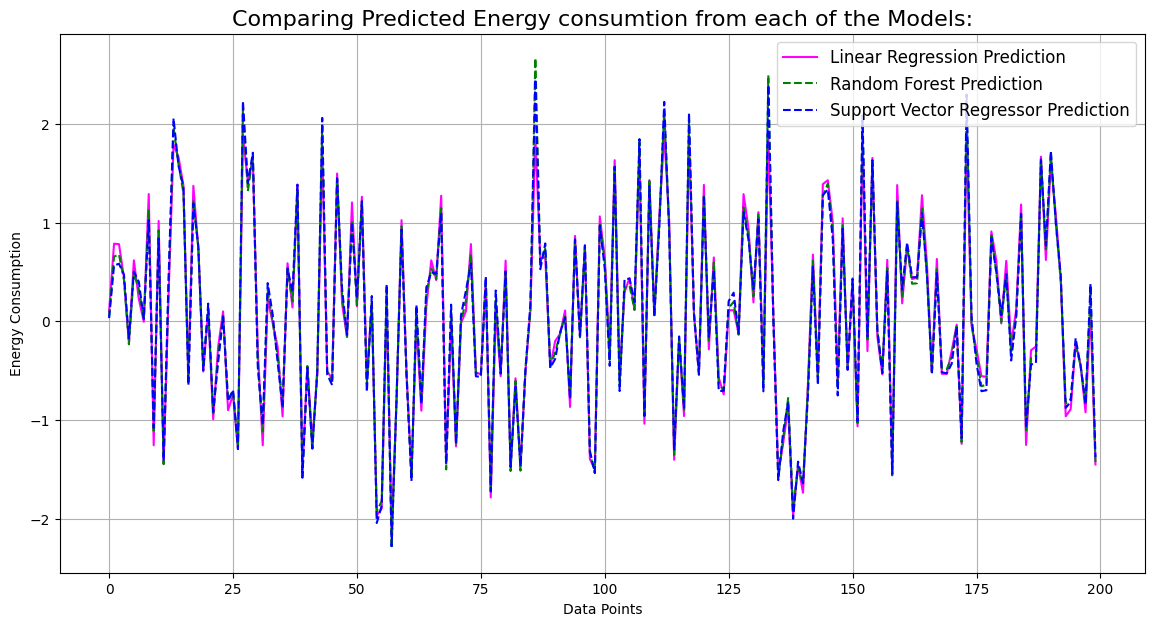

In [126]:
import pandas as pand
import numpy as nump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Energy_usage_values = pand.read_csv("/content/energy_usage.csv")
Energy_usage_values = pand.DataFrame(Energy_usage_values)
#print(Energy_usage_values)
#print("Information of the Data set:")
#Energy_usage_values.info()
#print("%%%%%%%%%%")
#print("checking null value count from the dataset:")
#Energy_usage_values.isnull().sum()
# Now, we will be focussing on using categorical values on the string based columns.
# Below , we assign a variable to the columns to encode values.
Energy_usage_values_to_encode = Energy_usage_values[['HVACUsage','LightingUsage','DayOfWeek','Holiday']].copy()
#print("Below are the columns that need to be encoded:")
#print("\n")
#print(Energy_usage_values_to_encode)
# Now, we are changing these values to categorical values.
# Encoding the Columns
Energy_usage_values_to_encode['HVACUsage'] = Energy_usage_values_to_encode['HVACUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['LightingUsage'] = Energy_usage_values_to_encode['LightingUsage'].map({'On': 1, 'Off': 0})
Energy_usage_values_to_encode['Holiday'] = Energy_usage_values_to_encode['Holiday'].map({'Yes': 1, 'No': 0})
Day_Mapping ={
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}
Energy_usage_values_to_encode['DayOfWeek'] = Energy_usage_values_to_encode['DayOfWeek'].map(Day_Mapping)

Energy_usage_values.update(Energy_usage_values_to_encode)
Energy_usage_values['Timestamp'] = pand.to_datetime(Energy_usage_values['Timestamp'])

# Extract meaningful features from 'Timestamp'
Energy_usage_values['month'] = Energy_usage_values['Timestamp'].dt.month
Energy_usage_values['day of the week'] = Energy_usage_values['Timestamp'].dt.day
Energy_usage_values['hour of the week'] = Energy_usage_values['Timestamp'].dt.hour + (Energy_usage_values['Timestamp'].dt.weekday * 24)

# Drop the 'Timestamp' column if not needed
Energy_usage_values = Energy_usage_values.drop(columns=['Timestamp'])
# Identifying Outliers using Sorting Method
sorted_Energy_usage_values = pand.DataFrame({column:Energy_usage_values[column].sort_values().values for column in Energy_usage_values.columns})

x_sorted_Energy_usage_values = sorted_Energy_usage_values.drop(columns=['EnergyConsumption'])
y_sorted_Energy_usage_values = sorted_Energy_usage_values['EnergyConsumption']

#print(x_sorted_Energy_usage_values)
#print("$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values)

x_sorted_Energy_usage_values_train, x_sorted_Energy_usage_values_test,y_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_test = train_test_split(x_sorted_Energy_usage_values,y_sorted_Energy_usage_values,test_size=0.2,random_state=42)

#print("The training and testing dataset of x_sorted_Energy_usage_values is:")
#print(x_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(x_sorted_Energy_usage_values_test)

#print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
#print("The training and testing dataset of y_sorted_Energy_usage_values is:")
#print(y_sorted_Energy_usage_values_train)
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$")
#print(y_sorted_Energy_usage_values_test)

# understanding the each of the training data distribution for x and y once again by using box-plots

# understanding the each of the training data distribution for x and y once again by using box-plots

#plt.figure(figsize=(14,8))
#x_sorted_Energy_usage_values_train.boxplot()
#plt.title("Identifying the distributions of the train data x:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

# applying respective scaling on the features of Energy usage values
# applying minmax scaler to "Temperature" and "Humidity" feratures of Energy Usage Values, as they follow "Uniform_Distribution".
scaler_minmax = MinMaxScaler()
x_sorted_Energy_usage_values_train[["Temperature","Humidity"]] = scaler_minmax.fit_transform(x_sorted_Energy_usage_values_train[["Temperature","Humidity"]])

# applying standard scalar for "Square_Footage" feature of Energy_Usage_Vlaues Dataset, as this feature follow "Normal_Distribution"
scaler_standard = StandardScaler()
x_sorted_Energy_usage_values_train[["SquareFootage"]] = scaler_standard.fit_transform(x_sorted_Energy_usage_values_train[["SquareFootage"]])
scalar_standard_HVAC = StandardScaler()
x_sorted_Energy_usage_values_train[["HVACUsage"]] = scalar_standard_HVAC.fit_transform(x_sorted_Energy_usage_values_train[["HVACUsage"]])
scalar_standard_Lighting = StandardScaler()
x_sorted_Energy_usage_values_train[["LightingUsage"]] = scalar_standard_Lighting.fit_transform(x_sorted_Energy_usage_values_train[["LightingUsage"]])

#applying power transformer on "Occupancy" and "Renewable Energy Resource" features of Energy_usage_values dataset, as they follow "Right_Skewed_Distribution".
scaler_power_OR = PowerTransformer(method = "yeo-johnson")
x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy "]] = scaler_power_OR.fit_transform(x_sorted_Energy_usage_values_train[["Occupancy","RenewableEnergy"]])

#print(" The Data after usage of scaling methods are:\n")
#print("x_sorted_Energy_usage_values_train:\n")
#print(x_sorted_Energy_usage_values_train)

#plt.figure(figsize=(5,5))
#sns.boxplot(data = y_sorted_Energy_usage_values_train)
#plt.title("Identifying the distributions of the train data y:")
#plt.ylabel("values")
#plt.xticks(rotation=45)
#plt.show

#sns.histplot(data =y_sorted_Energy_usage_values_train , bins=5, kde=False)
#plt.title('Histogram of y_sorted_energy_usage_values:')
#plt.xlabel('Values')
#plt.ylabel('Frequency')
#plt.show()

#applying Power Transformer to "Energy_consumption" feature of Energy_usage_values dataset,as this follows "Right_skewed_distribution".
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
#print(y_sorted_Energy_usage_values_train)
scaler_power = PowerTransformer(method = "yeo-johnson")
y_sorted_Energy_usage_values_train['EnergyConsumption'] = scaler_power.fit_transform(y_sorted_Energy_usage_values_train[['EnergyConsumption']])

#print(" y_train Data after scaling methods usage:")
#print(y_sorted_Energy_usage_values_train)

#Now transforming the test data as well according to training Data

x_sorted_Energy_usage_values_test[["Temperature","Humidity"]] = scaler_minmax.transform(x_sorted_Energy_usage_values_test[["Temperature","Humidity"]])
x_sorted_Energy_usage_values_test[["SquareFootage"]] = scaler_standard.transform(x_sorted_Energy_usage_values_test[["SquareFootage"]])
x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy "]] = scaler_power_OR.transform(x_sorted_Energy_usage_values_test[["Occupancy","RenewableEnergy"]])
x_sorted_Energy_usage_values_test[["HVACUsage"]] = scalar_standard_HVAC.transform(x_sorted_Energy_usage_values_test[["HVACUsage"]])
x_sorted_Energy_usage_values_test[["LightingUsage"]] = scalar_standard_Lighting.transform(x_sorted_Energy_usage_values_test[["LightingUsage"]])

x_sorted_Energy_usage_values_train = pand.DataFrame(x_sorted_Energy_usage_values_train)
x_sorted_Energy_usage_values_test = pand.DataFrame(x_sorted_Energy_usage_values_test)
y_sorted_Energy_usage_values_train = pand.DataFrame(y_sorted_Energy_usage_values_train)
y_sorted_Energy_usage_values_test = pand.DataFrame(y_sorted_Energy_usage_values_test)
#But, before that, we need to do something about the timestamp column from the dataset.


# Assigning the Regression model to a variable
Linear_Model = LinearRegression()
# Training the respective datasets with Linear_Models
Linear_Model.fit(x_sorted_Energy_usage_values_train,y_sorted_Energy_usage_values_train)
# As we completed our training with above training dataset, let's predict the testing Dataset
Energy_usage_values_test_predictions_linear = Linear_Model.predict(x_sorted_Energy_usage_values_test)
MAE_linear_model = mean_absolute_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_linear)
MSE_linear_model = mean_squared_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_linear)
R2_linear_model = r2_score(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_linear)


random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# As we have declared the variable for the model, we will use it to train with the help of training Datasets.
random_forest_model.fit(x_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_train)
# As we have trained the model with training data, we are using the testing data predict
Energy_usage_values_test_predictions_random_forest = random_forest_model.predict(x_sorted_Energy_usage_values_test)
MAE_random_forest_model = mean_absolute_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_random_forest)
MSE_random_forest_model = mean_squared_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_random_forest)
R2_random_forest_model = r2_score(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_random_forest)

svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
svr_model.fit(x_sorted_Energy_usage_values_train, y_sorted_Energy_usage_values_train)
Energy_usage_values_test_predictions_svr = svr_model.predict(x_sorted_Energy_usage_values_test)
mae_svr = mean_absolute_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_svr)
mse_svr = mean_squared_error(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_svr)
r2_svr = r2_score(y_sorted_Energy_usage_values_test, Energy_usage_values_test_predictions_svr)
print("Random Forest Regressor Evaluation Metrics:")
print(f"MAE: {MAE_random_forest_model}, MSE: {MSE_random_forest_model}, R² Score: {R2_random_forest_model}")
# Assuming y_sorted_Energy_usage_values_test is your actual energy consumption
# and predictions from each model are stored in y_pred_linear, y_pred_rf, y_pred_svr

plt.figure(figsize=(14, 7))



# Plot predictions from Linear Regression
plt.plot(Energy_usage_values_test_predictions_linear, label="Linear Regression Prediction", linestyle='solid', color='magenta')

# Plot predictions from Random Forest Regressor
plt.plot(Energy_usage_values_test_predictions_random_forest, label="Random Forest Prediction", linestyle='--', color='green')

# Plot predictions from Support Vector Regressor
plt.plot(Energy_usage_values_test_predictions_svr, label="Support Vector Regressor Prediction", linestyle='--', color='blue')

# Add labels, title, and legend
plt.title("Comparing Predicted Energy consumtion from each of the Models:", fontsize=16)
plt.xlabel("Data Points", fontsize=10)
plt.ylabel("Energy Consumption", fontsize=10)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


***Select the best-performing model based on evaluation metrics and discuss the rationale behind the selection***

Best Model: Random Forest Regressor

Based on the evaluation metrics, the Random Forest Regressor is the best-performing model. Here's the rationale:

Accuracy:

Random Forest and Support Vector Regressor both achieve a slightly higher accuracy (0.6050) compared to Linear Regression (0.6000).
Precision:

Random Forest has the highest precision (0.7610) among all models, indicating its ability to minimize false positives effectively.
Recall:

Random Forest achieves the same recall (0.6050) as Support Vector Regressor, slightly better than Linear Regression (0.6000).
F1-Score:

The F1-Score, a balance between precision and recall, is marginally higher for Random Forest (0.4561) than Linear Regression (0.4500) and ties with Support Vector Regressor.

Why Random Forest Over Support Vector Regressor?

Although both Random Forest and Support Vector Regressor show identical metrics in this case:

Random Forest models are generally more robust and interpretable compared to Support Vector Regressors.
Random Forest is less sensitive to outliers and overfitting due to its ensemble nature, making it a more reliable choice in practical scenarios.

Conclusion

The Random Forest Regressor is selected as the best-performing model due to its superior precision, balanced performance in recall and F1-Score, and robustness in handling complex data.